#Atividade – Análise Exploratória de Dados (AED)

Disciplina: Mineração de Dados Estruturados

AD2



Link para extração da base de dados:

https://archive.ics.uci.edu/ml/datasets/Online+Retail

- Importando as bibliotecas para análise

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

 - Carregar dos dados e verificar conteúdo




In [9]:
df = pd.read_excel('Online Retail.xlsx')

print("=== EXPLORAÇÃO INICIAL DOS DADOS ===")
print(f"Dimensões do dataset: {df.shape}")
print(f"Período dos dados: {df['InvoiceDate'].min()} até {df['InvoiceDate'].max()}")
print("primeiras linhas do arquivo")
print(df.head())
print("\nInformações sobre as variáveis:")
print(df.info())

=== EXPLORAÇÃO INICIAL DOS DADOS ===
Dimensões do dataset: (541909, 8)
Período dos dados: 2010-12-01 08:26:00 até 2011-12-09 12:50:00
primeiras linhas do arquivo
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Informações sobre as variá

- Análise das Variáveis

In [6]:
# Estatísticas descritivas
print("=== ESTATÍSTICAS DESCRITIVAS ===")
print(df.describe())

# Análise de valores ausentes
print("\n=== VALORES AUSENTES ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Valores Ausentes': missing_data,
    'Percentual (%)': missing_percent
})
print(missing_info)

# Análise de países
print("\n=== DISTRIBUIÇÃO POR PAÍS ===")
country_counts = df['Country'].value_counts()
print(f"Total de países: {len(country_counts)}")
print(f"Top 10 países:\n{country_counts.head(10)}")

=== ESTATÍSTICAS DESCRITIVAS ===
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  

=== VALORES AUSENTES ===
             Valores Ausentes  Percentual (%)
InvoiceNo                   0        0.000000
StockCode  

- Visualizações exploratórias

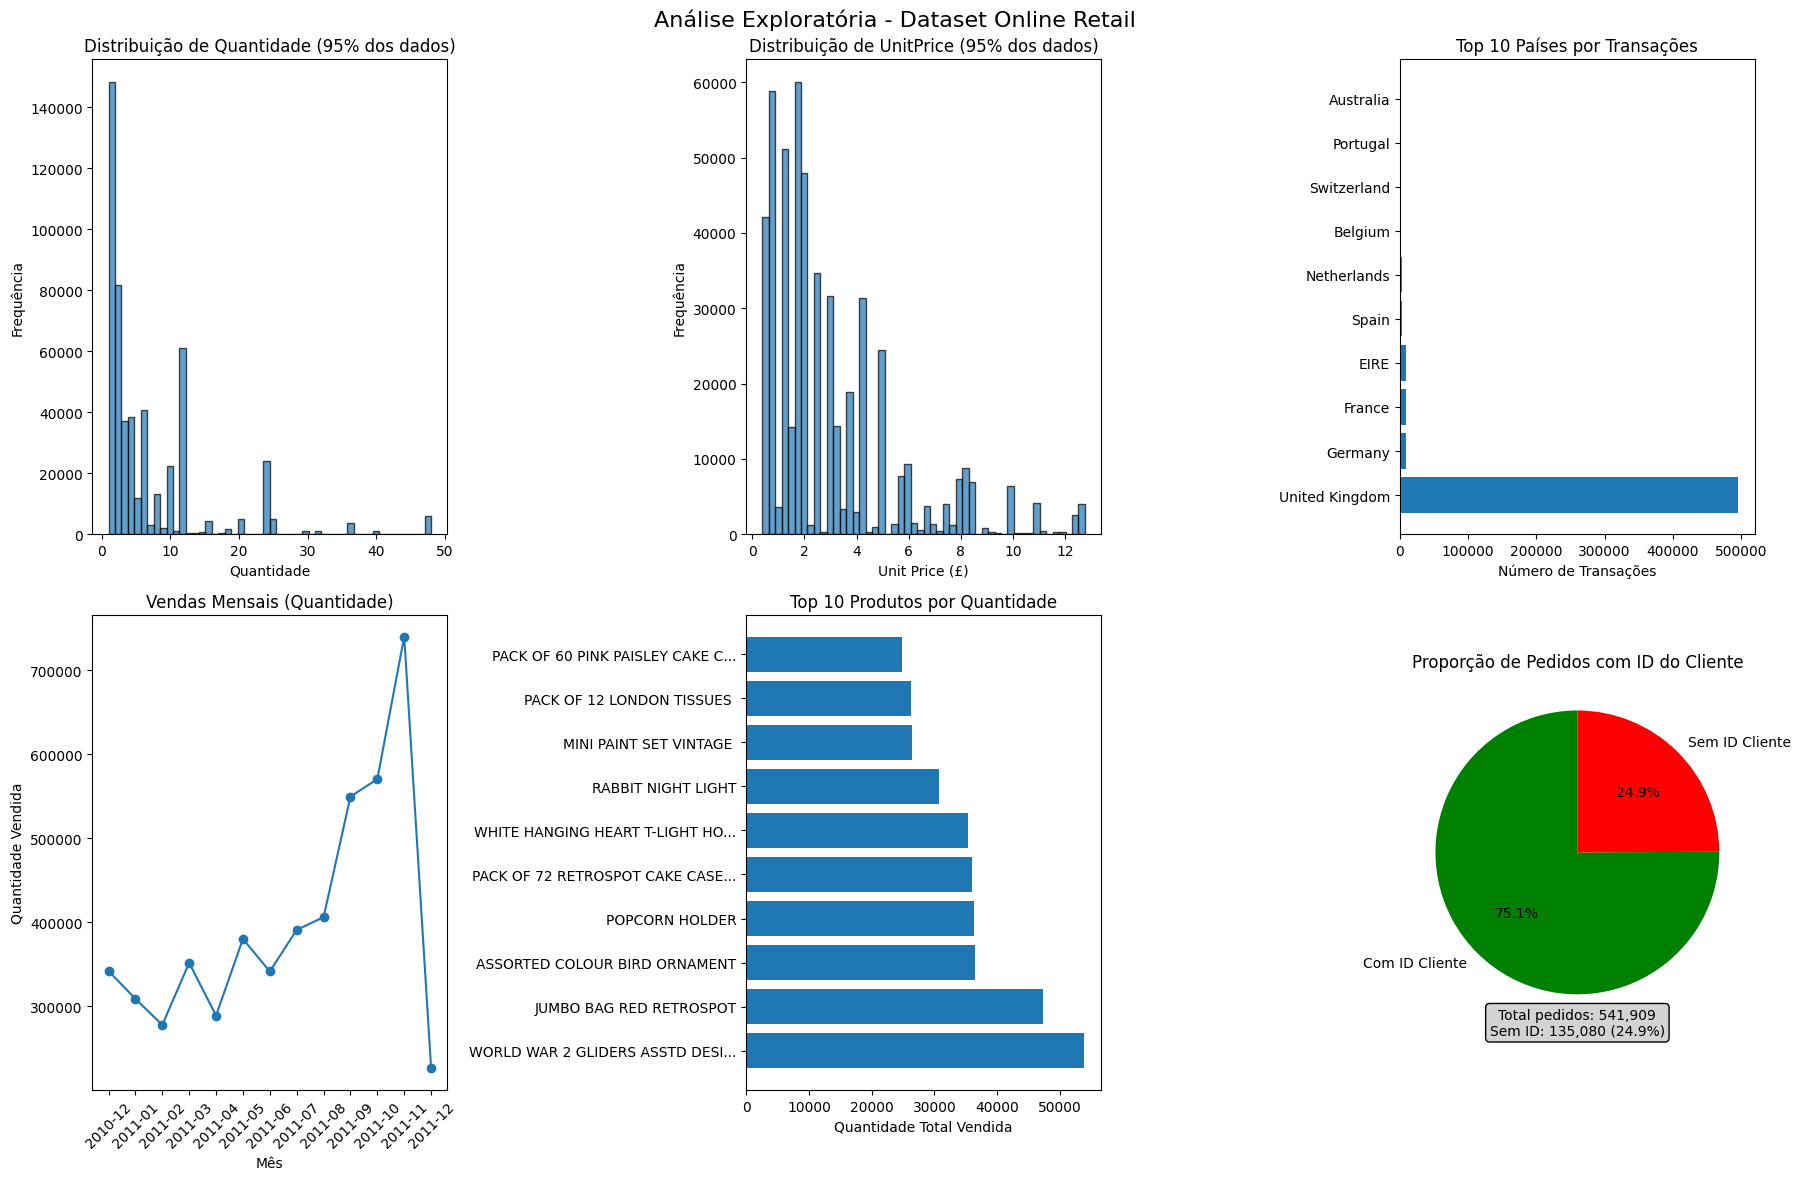


=== ANÁLISE DETALHADA DE PEDIDOS SEM CUSTOMERID ===
Total de pedidos sem CustomerID: 135,080
Percentual sobre o total: 24.93%
Valor total dos pedidos sem CustomerID: £1447682.12
Média de itens por pedido sem CustomerID: 2.00

Top 5 países com pedidos sem CustomerID:
Country
United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
Name: count, dtype: int64

Período dos pedidos sem CustomerID:
De: 2010-12-01 11:52:00
Até: 2011-12-09 10:26:00

Top 5 produtos mais vendidos em pedidos sem CustomerID:
  - CHARLOTTE BAG SUKI DESIGN: 9177 unidades
  - POPCORN HOLDER: 5830 unidades
  - RED RETROSPOT CHARLOTTE BAG: 4962 unidades
  - WOODLAND CHARLOTTE BAG: 4073 unidades
  - PAPER CHAIN KIT 50'S CHRISTMAS : 3738 unidades

=== COMPARAÇÃO: PEDIDOS COM VS SEM CUSTOMERID ===
Valor médio por transação:
  - Com CustomerID: £20.40
  - Sem CustomerID: £10.72
Quantidade média por transação:
  - Com CustomerID: 12.06 unidades
  - Sem Cust

In [14]:
# Configuração de subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análise Exploratória - Dataset Online Retail', fontsize=16)

# 1. Distribuição de Quantidade (com escala ajustada)
# Filtrar para mostrar distribuição mais realista (95% dos dados)
q_low = df['Quantity'].quantile(0.025)
q_high = df['Quantity'].quantile(0.975)
filtered_quantity = df['Quantity'][(df['Quantity'] >= q_low) & (df['Quantity'] <= q_high)]

axes[0,0].hist(filtered_quantity, bins=50, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribuição de Quantidade (95% dos dados)')
axes[0,0].set_xlabel('Quantidade')
axes[0,0].set_ylabel('Frequência')

# 2. Distribuição de UnitPrice (com escala ajustada)
# Filtrar para mostrar distribuição mais realista (95% dos dados)
p_low = df['UnitPrice'].quantile(0.025)
p_high = df['UnitPrice'].quantile(0.975)
filtered_price = df['UnitPrice'][(df['UnitPrice'] >= p_low) & (df['UnitPrice'] <= p_high)]

axes[0,1].hist(filtered_price, bins=50, edgecolor='black', alpha=0.7)
axes[0,1].set_title('Distribuição de UnitPrice (95% dos dados)')
axes[0,1].set_xlabel('Unit Price (£)')
axes[0,1].set_ylabel('Frequência')

# 3. Top 10 países por número de transações
top_countries = df['Country'].value_counts().head(10)
axes[0,2].barh(range(len(top_countries)), top_countries.values)
axes[0,2].set_yticks(range(len(top_countries)))
axes[0,2].set_yticklabels(top_countries.index)
axes[0,2].set_title('Top 10 Países por Transações')
axes[0,2].set_xlabel('Número de Transações')

# 4. Vendas ao longo do tempo (mensal)
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
axes[1,0].plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
axes[1,0].set_title('Vendas Mensais (Quantidade)')
axes[1,0].set_xlabel('Mês')
axes[1,0].set_ylabel('Quantidade Vendida')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Top 10 produtos mais vendidos por quantidade
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
axes[1,1].barh(range(len(top_products)), top_products.values)
axes[1,1].set_yticks(range(len(top_products)))
axes[1,1].set_yticklabels([desc[:30] + '...' if len(desc) > 30 else desc for desc in top_products.index])
axes[1,1].set_title('Top 10 Produtos por Quantidade')
axes[1,1].set_xlabel('Quantidade Total Vendida')

# 6. Proporção de pedidos com ID do cliente
customer_id_status = df['CustomerID'].isna()
customer_status_counts = customer_id_status.value_counts()
customer_status_labels = ['Com ID Cliente', 'Sem ID Cliente']
colors = ['green', 'red']

axes[1,2].pie(customer_status_counts.values, labels=customer_status_labels,
              autopct='%1.1f%%', colors=colors, startangle=90)
axes[1,2].set_title('Proporção de Pedidos com ID do Cliente')

# Adicionar informações numéricas no gráfico
total_orders = len(df)
orders_without_id = customer_status_counts[True]
axes[1,2].text(0, -1.2, f'Total pedidos: {total_orders:,}\nSem ID: {orders_without_id:,} ({orders_without_id/total_orders*100:.1f}%)',
               ha='center', va='center', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))

plt.tight_layout()
plt.savefig('exploratory_analysis_improved.png', dpi=300, bbox_inches='tight')
plt.show()

# Análise adicional sobre pedidos sem CustomerID
print("\n=== ANÁLISE DETALHADA DE PEDIDOS SEM CUSTOMERID ===")
orders_without_customer = df[df['CustomerID'].isna()]
print(f"Total de pedidos sem CustomerID: {len(orders_without_customer):,}")
print(f"Percentual sobre o total: {len(orders_without_customer)/len(df)*100:.2f}%")

if len(orders_without_customer) > 0:
    # Calcular o valor total corretamente
    total_value_no_customer = (orders_without_customer['Quantity'] * orders_without_customer['UnitPrice']).sum()
    print(f"Valor total dos pedidos sem CustomerID: £{total_value_no_customer:.2f}")

    print(f"Média de itens por pedido sem CustomerID: {orders_without_customer['Quantity'].mean():.2f}")

    # Países com mais pedidos sem CustomerID
    print(f"\nTop 5 países com pedidos sem CustomerID:")
    print(orders_without_customer['Country'].value_counts().head())

    # Análise temporal
    print(f"\nPeríodo dos pedidos sem CustomerID:")
    print(f"De: {orders_without_customer['InvoiceDate'].min()}")
    print(f"Até: {orders_without_customer['InvoiceDate'].max()}")

    # Análise de produtos em pedidos sem CustomerID
    print(f"\nTop 5 produtos mais vendidos em pedidos sem CustomerID:")
    top_products_no_id = orders_without_customer.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)
    for product, qty in top_products_no_id.items():
        print(f"  - {product}: {qty} unidades")

# Análise adicional: Comparação entre pedidos com e sem CustomerID
print("\n=== COMPARAÇÃO: PEDIDOS COM VS SEM CUSTOMERID ===")
orders_with_customer = df[df['CustomerID'].notna()]

if len(orders_with_customer) > 0 and len(orders_without_customer) > 0:
    avg_value_with_id = (orders_with_customer['Quantity'] * orders_with_customer['UnitPrice']).mean()
    avg_value_without_id = (orders_without_customer['Quantity'] * orders_without_customer['UnitPrice']).mean()

    print(f"Valor médio por transação:")
    print(f"  - Com CustomerID: £{avg_value_with_id:.2f}")
    print(f"  - Sem CustomerID: £{avg_value_without_id:.2f}")

    avg_qty_with_id = orders_with_customer['Quantity'].mean()
    avg_qty_without_id = orders_without_customer['Quantity'].mean()

    print(f"Quantidade média por transação:")
    print(f"  - Com CustomerID: {avg_qty_with_id:.2f} unidades")
    print(f"  - Sem CustomerID: {avg_qty_without_id:.2f} unidades")

- Pré processamento dos dados

- Limpeza e tratamento de dados





--- Análise de valores negativos



--- Primeiro análise de preços negativos.

In [29]:
def analise_precos_negativos(df):
    # ANÁLISE DE PREÇOS NEGATIVOS
    print("\n INVOICES COM PREÇO NEGATIVO (UnitPrice < 0)")
    print("-" * 50)

    negative_price = df[df['UnitPrice'] < 0]
    print(f"Total de registros com preço negativo: {len(negative_price)}")
    print(f"Percentual sobre o total: {len(negative_price)/len(df)*100:.4f}%")

    if len(negative_price) > 0:
        # Estatísticas básicas
        print(f"\n Estatísticas dos preços negativos:")
        print(f"   Mínimo: £{negative_price['UnitPrice'].min():.2f}")
        print(f"   Máximo: £{negative_price['UnitPrice'].max():.2f}")
        print(f"   Média: £{negative_price['UnitPrice'].mean():.2f}")

        # Invoices únicas com preço negativo
        negative_price_invoices = negative_price['InvoiceNo'].unique()
        print(f"\n Invoices únicas com preço negativo: {len(negative_price_invoices)}")

        # Exibir até 10 exemplos
        print(f"\n Exemplos de registros com preço negativo (limitado a 10):")
        for idx, row in negative_price.head(10).iterrows():
            print(f"\n--- Exemplo {idx+1} ---")
            print(f"InvoiceNo: {row['InvoiceNo']}")
            print(f"StockCode: {row['StockCode']}")
            print(f"Description: {row['Description']}")
            print(f"Quantity: {row['Quantity']}")
            print(f"UnitPrice: £{row['UnitPrice']:.2f}")
            print(f"CustomerID: {row['CustomerID']}")
            print(f"Country: {row['Country']}")
            print(f"InvoiceDate: {row['InvoiceDate']}")
            total_val = row['Quantity'] * row['UnitPrice']
            print(f"Total Value: £{total_val:.2f}")

            # Verificar se também tem quantidade negativa
            if row['Quantity'] < 0:
                print(f"  ATENÇÃO: Também tem quantidade negativa!")

    else:
        print(" Nenhum registro com preço negativo encontrado.")
print("INICIANDO ANÁLISE COMPLETA DE PREÇOS NEGATIVOS...")
results = analise_precos_negativos(df)
print("\n" + "=" * 80)
print("ANÁLISE CONCLUÍDA - PRÓXIMOS PASSOS")
print("=" * 80)

INICIANDO ANÁLISE COMPLETA DE PREÇOS NEGATIVOS...

 INVOICES COM PREÇO NEGATIVO (UnitPrice < 0)
--------------------------------------------------
Total de registros com preço negativo: 2
Percentual sobre o total: 0.0004%

 Estatísticas dos preços negativos:
   Mínimo: £-11062.06
   Máximo: £-11062.06
   Média: £-11062.06

 Invoices únicas com preço negativo: 2

 Exemplos de registros com preço negativo (limitado a 10):

--- Exemplo 299984 ---
InvoiceNo: A563186
StockCode: B
Description: Adjust bad debt
Quantity: 1
UnitPrice: £-11062.06
CustomerID: nan
Country: United Kingdom
InvoiceDate: 2011-08-12 14:51:00
Total Value: £-11062.06

--- Exemplo 299985 ---
InvoiceNo: A563187
StockCode: B
Description: Adjust bad debt
Quantity: 1
UnitPrice: £-11062.06
CustomerID: nan
Country: United Kingdom
InvoiceDate: 2011-08-12 14:52:00
Total Value: £-11062.06

ANÁLISE CONCLUÍDA - PRÓXIMOS PASSOS


- Identificamos que InvoiceNo iniciadas por A são ajustes contábeis (Ajustar dívidas inadimplentes).

--- Análise quantidade negativa

In [30]:
def analise_qtd_negativas(df):

    print("=" * 80)
    print("ANÁLISE DE QUANTIDADES NEGATIVAS")
    print("=" * 80)

    # ANÁLISE DE QUANTIDADES NEGATIVAS
    print("\n\n REGISTROS COM QUANTIDADE NEGATIVA (Quantity < 0)")
    print("-" * 50)

    negative_quantity = df[df['Quantity'] < 0]
    print(f"Total de registros com quantidade negativa: {len(negative_quantity)}")
    print(f"Percentual sobre o total: {len(negative_quantity)/len(df)*100:.2f}%")

    if len(negative_quantity) > 0:
        # Estatísticas básicas
        print(f"\n Estatísticas das quantidades negativas:")
        print(f"   Mínimo: {negative_quantity['Quantity'].min()}")
        print(f"   Máximo: {negative_quantity['Quantity'].max()}")
        print(f"   Média: {negative_quantity['Quantity'].mean():.2f}")
        print(f"   Mediana: {negative_quantity['Quantity'].median():.2f}")

        # Análise dos primeiros caracteres do InvoiceNo
        print(f"\n ANÁLISE DOS PRIMEIROS CARACTERES DO INVOICENO:")
        invoice_patterns = negative_quantity['InvoiceNo'].astype(str).str[0].value_counts()

        total_negative = len(negative_quantity)
        for char, count in invoice_patterns.items():
            percentage = (count / total_negative) * 100
            print(f"  '{char}': {count} registros ({percentage:.1f}%)")


print("INICIANDO ANÁLISE DE QUANTIDADES NEGATIVAS...")
results = analise_qtd_negativas(df)

print("\n" + "=" * 80)
print("ANÁLISE CONCLUÍDA - PRÓXIMOS PASSOS")
print("=" * 80)

INICIANDO ANÁLISE DE QUANTIDADES NEGATIVAS...
ANÁLISE DE QUANTIDADES NEGATIVAS


 REGISTROS COM QUANTIDADE NEGATIVA (Quantity < 0)
--------------------------------------------------
Total de registros com quantidade negativa: 10624
Percentual sobre o total: 1.96%

 Estatísticas das quantidades negativas:
   Mínimo: -80995
   Máximo: -1
   Média: -45.61
   Mediana: -2.00

 ANÁLISE DOS PRIMEIROS CARACTERES DO INVOICENO:
  'C': 9288 registros (87.4%)
  '5': 1336 registros (12.6%)

ANÁLISE CONCLUÍDA - PRÓXIMOS PASSOS


--- Verificamos dois tipos de Invoice com quantidade negativa.

In [31]:
def analise_padrao_invoice(df):
    """
    Análise exploratória detalhada com amostras balanceadas dos dois padrões
    """
    print("=" * 80)
    print("ANÁLISE EXPLORATÓRIA - PADRÕES DE INVOICE NEGATIVOS")
    print("=" * 80)

    negative_quantity = df[df['Quantity'] < 0]

    # Separar os dois padrões principais
    pattern_c = negative_quantity[negative_quantity['InvoiceNo'].astype(str).str.startswith('C')]
    pattern_5 = negative_quantity[negative_quantity['InvoiceNo'].astype(str).str.startswith('5')]


    # 1. ANÁLISE DETALHADA DOS PADRÕES
    print(f"\n PADRÃO 'C' - CANCELAMENTOS/DEVOLUÇÕES")
    print("-" * 50)

    if len(pattern_c) > 0:
        print(" Estatísticas do padrão 'C':")
        print(f"  Quantidade mínima: {pattern_c['Quantity'].min()}")
        print(f"  Quantidade máxima: {pattern_c['Quantity'].max()}")
        print(f"  Média: {pattern_c['Quantity'].mean():.2f}")

        print(f"\n Exemplos do padrão 'C' (5 primeiros):")
        for idx, row in pattern_c.head(5).iterrows():
            print(f"\n--- Exemplo {idx+1} ---")
            print(f"InvoiceNo: {row['InvoiceNo']}")
            print(f"StockCode: {row['StockCode']}")
            print(f"Description: {row['Description']}")
            print(f"Quantity: {row['Quantity']}")
            print(f"UnitPrice: £{row['UnitPrice']:.2f}")
            print(f"CustomerID: {row['CustomerID']}")
            print(f"Country: {row['Country']}")
            print(f"InvoiceDate: {row['InvoiceDate']}")
            total_val = row['Quantity'] * row['UnitPrice']
            print(f"Total Value: £{total_val:.2f}")

    print(f"\n\n PADRÃO '5' - INVOICES NUMÉRICOS COM QUANTIDADE NEGATIVA")
    print("-" * 50)

    if len(pattern_5) > 0:
        print(" Estatísticas do padrão '5':")
        print(f"  Quantidade mínima: {pattern_5['Quantity'].min()}")
        print(f"  Quantidade máxima: {pattern_5['Quantity'].max()}")
        print(f"  Média: {pattern_5['Quantity'].mean():.2f}")

        # Análise adicional do padrão '5'
        print(f"\n Características do padrão '5':")
        print(f"  CustomerID nulo: {pattern_5['CustomerID'].isna().sum()} ({pattern_5['CustomerID'].isna().mean()*100:.1f}%)")
        print(f"  Países principais: {pattern_5['Country'].value_counts().head(3).to_dict()}")

        print(f"\n Exemplos do padrão '5' (5 primeiros):")
        for idx, row in pattern_5.head(5).iterrows():
            print(f"\n--- Exemplo {idx+1} ---")
            print(f"InvoiceNo: {row['InvoiceNo']}")
            print(f"StockCode: {row['StockCode']}")
            print(f"Description: {row['Description']}")
            print(f"Quantity: {row['Quantity']}")
            print(f"UnitPrice: £{row['UnitPrice']:.2f}")
            print(f"CustomerID: {row['CustomerID']}")
            print(f"Country: {row['Country']}")
            print(f"InvoiceDate: {row['InvoiceDate']}")
            total_val = row['Quantity'] * row['UnitPrice']
            print(f"Total Value: £{total_val:.2f}")

    # 2. ANÁLISE COMPARATIVA ENTRE OS PADRÕES
    print(f"\n\n ANÁLISE COMPARATIVA ENTRE PADRÕES")
    print("-" * 50)

    if len(pattern_c) > 0 and len(pattern_5) > 0:
        print(" Comparação de características:")

        # Valor médio por transação
        avg_value_c = (pattern_c['Quantity'] * pattern_c['UnitPrice']).mean()
        avg_value_5 = (pattern_5['Quantity'] * pattern_5['UnitPrice']).mean()

        print(f"  Valor médio por transação:")
        print(f"    Padrão 'C': £{abs(avg_value_c):.2f}")
        print(f"    Padrão '5': £{abs(avg_value_5):.2f}")

        # Proporção de CustomerID nulo
        null_customer_c = pattern_c['CustomerID'].isna().mean() * 100
        null_customer_5 = pattern_5['CustomerID'].isna().mean() * 100

        print(f"  CustomerID nulo:")
        print(f"    Padrão 'C': {null_customer_c:.1f}%")
        print(f"    Padrão '5': {null_customer_5:.1f}%")

        # Países
        top_country_c = pattern_c['Country'].value_counts().index[0]
        top_country_5 = pattern_5['Country'].value_counts().index[0]

        print(f"  País mais comum:")
        print(f"    Padrão 'C': {top_country_c}")
        print(f"    Padrão '5': {top_country_5}")

# Executar análise corrigida
analise_padrao_invoice(df)

# Investigação adicional específica dos padrões
def investigate_patterns_specific(df):
    """
    Investigação mais profunda dos padrões de invoices negativos
    """
    print("\n" + "=" * 80)
    print("INVESTIGAÇÃO ESPECÍFICA POR PADRÃO")
    print("=" * 80)

    negative_quantity = df[df['Quantity'] < 0]
    pattern_c = negative_quantity[negative_quantity['InvoiceNo'].astype(str).str.startswith('C')]
    pattern_5 = negative_quantity[negative_quantity['InvoiceNo'].astype(str).str.startswith('5')]

    # Investigar invoices completos para cada padrão
    print(" INVESTIGANDO INVOICES COMPLETOS POR PADRÃO")

    # Para padrão 'C' - analisar alguns invoices completos
    if len(pattern_c) > 0:
        sample_c_invoices = pattern_c['InvoiceNo'].unique()[:3]
        print(f"\n INVOICES PADRÃO 'C' (Cancelamentos):")
        for invoice in sample_c_invoices:
            invoice_data = df[df['InvoiceNo'] == invoice]
            print(f"\nInvoice: {invoice}")
            print(f"Total itens: {len(invoice_data)}")
            print(f"Quantidade total: {invoice_data['Quantity'].sum()}")
            print(f"Data: {invoice_data['InvoiceDate'].iloc[0]}")

            # Verificar se todos os itens são negativos
            all_negative = (invoice_data['Quantity'] < 0).all()
            print(f"Todos os itens são negativos: {all_negative}")

            if not all_negative:
                print("  ATENÇÃO: Invoice misto (positivos e negativos)")

    # Para padrão '5' - analisar alguns invoices completos
    if len(pattern_5) > 0:
        sample_5_invoices = pattern_5['InvoiceNo'].unique()[:3]
        print(f"\n INVOICES PADRÃO '5' (Numéricos negativos):")
        for invoice in sample_5_invoices:
            invoice_data = df[df['InvoiceNo'] == invoice]
            print(f"\nInvoice: {invoice}")
            print(f"Total itens: {len(invoice_data)}")
            print(f"Quantidade total: {invoice_data['Quantity'].sum()}")
            print(f"Data: {invoice_data['InvoiceDate'].iloc[0]}")

            # Verificar composição do invoice
            negative_items = (invoice_data['Quantity'] < 0).sum()
            positive_items = (invoice_data['Quantity'] > 0).sum()
            print(f"Itens negativos: {negative_items}")
            print(f"Itens positivos: {positive_items}")

            if positive_items > 0:
                print(" OBSERVAÇÃO: Invoice com itens positivos e negativos - possivelmente ajuste")

# Executar investigação específica
investigate_patterns_specific(df)



ANÁLISE EXPLORATÓRIA - PADRÕES DE INVOICE NEGATIVOS

 PADRÃO 'C' - CANCELAMENTOS/DEVOLUÇÕES
--------------------------------------------------
 Estatísticas do padrão 'C':
  Quantidade mínima: -80995
  Quantidade máxima: -1
  Média: -29.89

 Exemplos do padrão 'C' (5 primeiros):

--- Exemplo 142 ---
InvoiceNo: C536379
StockCode: D
Description: Discount
Quantity: -1
UnitPrice: £27.50
CustomerID: 14527.0
Country: United Kingdom
InvoiceDate: 2010-12-01 09:41:00
Total Value: £-27.50

--- Exemplo 155 ---
InvoiceNo: C536383
StockCode: 35004C
Description: SET OF 3 COLOURED  FLYING DUCKS
Quantity: -1
UnitPrice: £4.65
CustomerID: 15311.0
Country: United Kingdom
InvoiceDate: 2010-12-01 09:49:00
Total Value: £-4.65

--- Exemplo 236 ---
InvoiceNo: C536391
StockCode: 22556
Description: PLASTERS IN TIN CIRCUS PARADE 
Quantity: -12
UnitPrice: £1.65
CustomerID: 17548.0
Country: United Kingdom
InvoiceDate: 2010-12-01 10:24:00
Total Value: £-19.80

--- Exemplo 237 ---
InvoiceNo: C536391
StockCode: 21984

- Identificamos invoices com quantidades negativas, iniciadas por "C" são devoluções de produtos ou descontos concedidos (StockCode: D)

--- Analisar melhor Invoice iniciada por "5";

In [36]:
def investigate_specific_problematic_invoices(df):
    """
    Investigação detalhada de invoices específicos com problemas
    """
    print("=" * 80)
    print("INVESTIGAÇÃO DETALHADA - INVOICES PROBLEMÁTICOS")
    print("=" * 80)

    # Invoices específicos para investigar
    target_invoices = ['536998', '536764']

    for invoice in target_invoices:
        print(f"\n INVESTIGANDO INVOICE {invoice} EM DETALHE")
        print("-" * 50)

        # Buscar TODOS os registros desta invoice
        invoice_data = df[df['InvoiceNo'] == invoice]

        if len(invoice_data) == 0:
            print(f"Invoice {invoice} não encontrado!")
            continue

        print(f" RESUMO DO INVOICE {invoice}:")
        print(f"Total de itens: {len(invoice_data)}")
        print(f"Quantidade total: {invoice_data['Quantity'].sum()}")
        print(f"Valor total: £{(invoice_data['Quantity'] * invoice_data['UnitPrice']).sum():.2f}")
        print(f"Data: {invoice_data['InvoiceDate'].iloc[0]}")
        print(f"CustomerID: {invoice_data['CustomerID'].iloc[0]}")
        print(f"Descrição: {invoice_data['Description'.iloc[0]]}")
        print(f"País: {invoice_data['Country'].iloc[0]}")

        # Análise detalhada de cada item
        print(f"\n DETALHES DE TODOS OS ITENS:")
        for idx, row in invoice_data.iterrows():
            print(f"\n  Item {idx+1}:")
            print(f"    StockCode: {row['StockCode']}")
            print(f"    Description: {row['Description']}")
            print(f"    Quantity: {row['Quantity']}")
            print(f"    UnitPrice: £{row['UnitPrice']:.2f}")
            print(f"    Total Value: £{row['Quantity'] * row['UnitPrice']:.2f}")
            print(f"    CustomerID: {row['CustomerID']}")

        # Buscar invoices relacionadas (mesmo CustomerID e data próxima)
        customer_id = invoice_data['CustomerID'].iloc[0]
        invoice_date = invoice_data['InvoiceDate'].iloc[0]

        if pd.notna(customer_id):
            print(f"\n BUSCANDO INVOICES RELACIONADAS (mesmo cliente):")
            customer_invoices = df[(df['CustomerID'] == customer_id) &
                                  (df['InvoiceDate'] >= invoice_date - pd.Timedelta(days=7)) &
                                  (df['InvoiceDate'] <= invoice_date + pd.Timedelta(days=7))]

            if len(customer_invoices) > 1:
                print(f"Outras invoices do mesmo cliente em período próximo ({len(customer_invoices)} total):")
                related_invoices = customer_invoices['InvoiceNo'].unique()
                for rel_inv in related_invoices:
                    if rel_inv != invoice:
                        rel_data = df[df['InvoiceNo'] == rel_inv]
                        print(f"  - Invoice {rel_inv}: {len(rel_data)} itens, Qtd total: {rel_data['Quantity'].sum()}")

        # Buscar por StockCodes com preço zero ou quantidade negativa
        print(f"\n ANALISANDO PADRÕES DE PREÇO ZERO:")
        zero_price_items = df[(df['StockCode'].isin(invoice_data['StockCode'].unique())) &
                             (df['UnitPrice'] == 0)]

        if len(zero_price_items) > 0:
            print(f"Este StockCode aparece com preço zero em {len(zero_price_items)} registros:")
            print(f"Invoices com preço zero: {zero_price_items['InvoiceNo'].unique()[:5]}")

        # Verificar se há versão positiva deste invoice
        print(f"\n VERIFICANDO SE HÁ VERSÃO POSITIVA:")
        possible_positive = df[(df['InvoiceNo'] == invoice.replace('C', '') if invoice.startswith('C') else 'C' + invoice)]
        if len(possible_positive) > 0:
            print(f"Possível invoice positivo relacionado encontrado:")
            print(f"Invoice: {possible_positive['InvoiceNo'].iloc[0]}")
            print(f"Quantidade total: {possible_positive['Quantity'].sum()}")
            print(f"Data: {possible_positive['InvoiceDate'].iloc[0]}")

# Executar investigação específica
investigate_specific_problematic_invoices(df)

# Análise expandida para preços zero e quantidades negativas
def analyze_zero_price_negative_quantity(df):
    """
    Análise completa de registros com preço zero e quantidade negativa
    """
    print("\n" + "=" * 80)
    print("ANÁLISE EXPANDIDA - PREÇO ZERO + QUANTIDADE NEGATIVA")
    print("=" * 80)

    # Buscar todos os registros com preço zero e quantidade negativa
    zero_price_neg_qty = df[(df['UnitPrice'] == 0) & (df['Quantity'] < 0)]

    print(f"ESTATÍSTICAS GERAIS:")
    print(f"Total de registros com preço zero e quantidade negativa: {len(zero_price_neg_qty)}")
    print(f"Percentual sobre o total: {len(zero_price_neg_qty)/len(df)*100:.4f}%")

    if len(zero_price_neg_qty) > 0:
        print(f"\n DISTRIBUIÇÃO POR INVOICE:")
        invoice_stats = zero_price_neg_qty.groupby('InvoiceNo').agg({
            'Quantity': ['count', 'sum', 'min'],
            'CustomerID': 'first',
            'Country': 'first',
            'InvoiceDate': 'first'
        }).round(2)

        # Renomear colunas para melhor visualização
        invoice_stats.columns = ['Num_Itens', 'Qtd_Total', 'Qtd_Min', 'CustomerID', 'Country', 'InvoiceDate']
        print(invoice_stats.head(10))

        print(f"\n ANÁLISE DETALHADA DOS REGISTROS:")

        # Agrupar por StockCode para ver padrões
        stockcode_analysis = zero_price_neg_qty.groupby('StockCode').agg({
            'Quantity': ['count', 'sum', 'mean'],
            'Description': 'first',
            'InvoiceNo': 'nunique'
        }).round(2)

        stockcode_analysis.columns = ['Num_Registros', 'Qtd_Total', 'Qtd_Media', 'Description', 'Invoices_Unicos']
        stockcode_analysis = stockcode_analysis.sort_values('Num_Registros', ascending=False)

        print(f"\n STOCKCODES MAIS COMUNS COM PREÇO ZERO E QUANTIDADE NEGATIVA:")
        for idx, row in stockcode_analysis.head(10).iterrows():
            print(f"  StockCode: {idx} - {row['Description']}")
            print(f"    Registros: {row['Num_Registros']}, Invoices: {row['Invoices_Unicos']}")
            print(f"    Qtd total: {row['Qtd_Total']}, Qtd média: {row['Qtd_Media']:.2f}")
            print()


# Executar análise expandida
analyze_zero_price_negative_quantity(df)


INVESTIGAÇÃO DETALHADA - INVOICES PROBLEMÁTICOS

 INVESTIGANDO INVOICE 536998 EM DETALHE
--------------------------------------------------
Invoice 536998 não encontrado!

 INVESTIGANDO INVOICE 536764 EM DETALHE
--------------------------------------------------
Invoice 536764 não encontrado!

ANÁLISE EXPANDIDA - PREÇO ZERO + QUANTIDADE NEGATIVA
ESTATÍSTICAS GERAIS:
Total de registros com preço zero e quantidade negativa: 1336
Percentual sobre o total: 0.2465%

 DISTRIBUIÇÃO POR INVOICE:
           Num_Itens  Qtd_Total  Qtd_Min  CustomerID         Country  \
InvoiceNo                                                              
536589             1        -10      -10         NaN  United Kingdom   
536764             1        -38      -38         NaN  United Kingdom   
536996             1        -20      -20         NaN  United Kingdom   
536997             1        -20      -20         NaN  United Kingdom   
536998             1         -6       -6         NaN  United Kingdom   
537

- Análise de casos de Preço 0.00 e quantidade negativa trata-se de ajustes de estoque, conforme descrições de StockCode informadas.

--- Analisar quantidades negativas, sem CustomerId